# R* and MRA* comparison*

## env

In [1]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter1d

plt.rcParams['figure.figsize'] = [15, 5]
EPS = 0.000001

In [2]:
import sys
import os

search_tools_path = os.path.join(os.getcwd(), 'search_tools')
if search_tools_path not in sys.path:
    sys.path.append(search_tools_path)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from moving_ai.mai_map_reader import MaiReader, MaiMaps
from pipeline import Pipeline
from task import Task

from algorithms.astar_heuristics import diagonal_dist
from algorithms.mrastar import MRAstar
from algorithms.wastar import WAstar
from algorithms.astar import Astar
from algorithms.rstar import Rstar

In [5]:
from processors.plot_expanded_and_actual_length_ratio import PlotExpandedAndActualLengthRatio
from processors.plot_success_rate import PlotSuccessRate
from processors.plot_mean_expanded import PlotMeanExpanded
from moving_ai.mai_map_visualizer import VisualizeMaiMap, VisualizeMaiMapGif

## Сравнение алгоритмов на разных картах

In [6]:
PROC = PlotSuccessRate().then(PlotExpandedAndActualLengthRatio())

#### Arena

In [29]:
area = MaiMaps.ARENA
algorithms = [
    Astar(diagonal_dist),
    WAstar(diagonal_dist, 3),
    MRAstar(diagonal_dist, resolutions=(1, 3), w_1=3, w_2=3),
    Rstar(diagonal_dist, D=3, K=10, w=3, exp_coeff=3)
]
r0 = MaiReader(area)

p0 = Pipeline(
    reader=r0,
    algorithms=algorithms,
    processor=PROC,
    timelimit=1
)

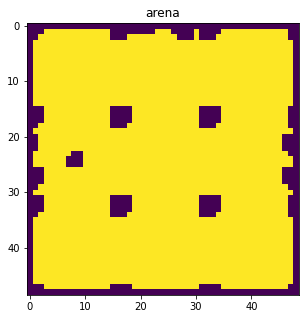

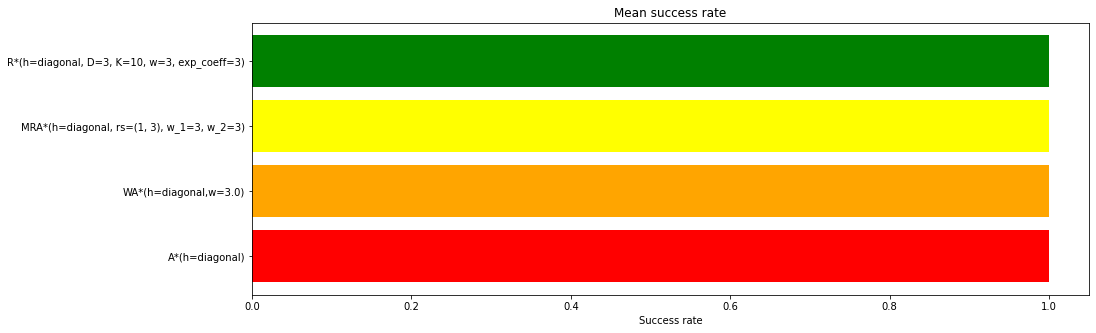

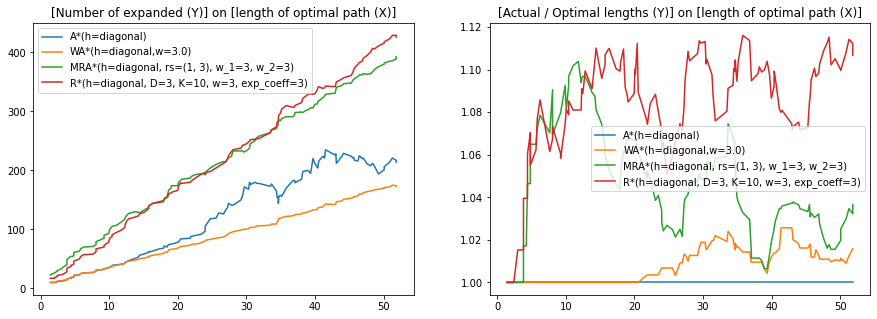

In [30]:
r0.read_map().draw(area)
p0.run()

#### DEN001D

In [18]:
area = MaiMaps.DEN001D
algorithms = [
    Astar(diagonal_dist),
    WAstar(diagonal_dist, 3),
    MRAstar(diagonal_dist, resolutions=(1, 3, 9), w_1=3, w_2=3),
    Rstar(diagonal_dist, D=10, K=10, w=3, exp_coeff=3)
]

r1 = MaiReader(area)

p2 = Pipeline(
    reader=r1,
    algorithms=algorithms,
    processor=PROC,
    timelimit=5
)

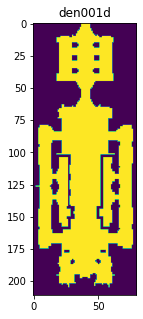

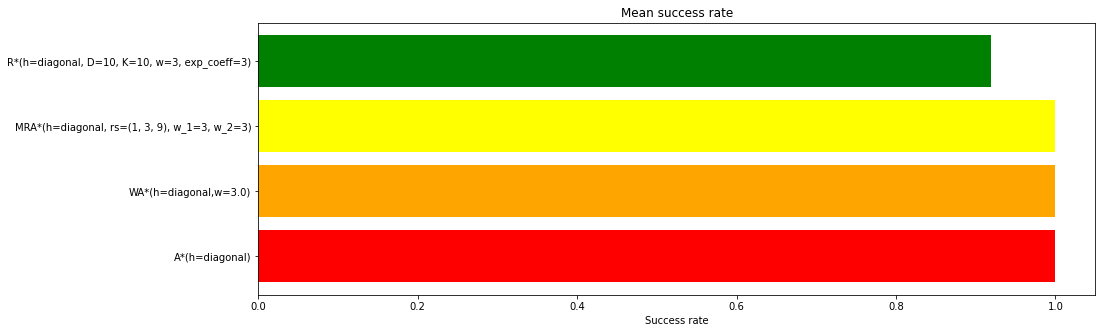

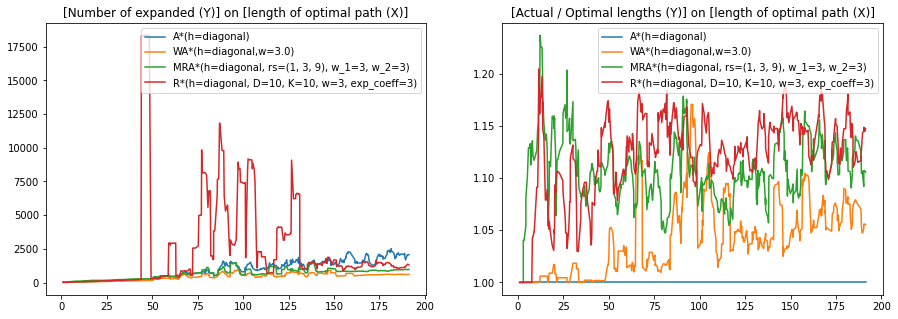

In [19]:
r1.read_map().draw(area)
p2.run()

#### Moscow

In [25]:
area = MaiMaps.MOSCOW
algorithms = [
    Astar(diagonal_dist),
    WAstar(diagonal_dist, 3),
    MRAstar(diagonal_dist, resolutions=(1, 3, 9), w_1=3, w_2=3),
    Rstar(diagonal_dist, D=30, K=10, w=3, exp_coeff=3)
]

r2 = MaiReader(area).with_sampled_count_tasks(100)

p1 = Pipeline(
    reader=r2,
    algorithms=algorithms,
    processor=PROC,
    timelimit=10
)

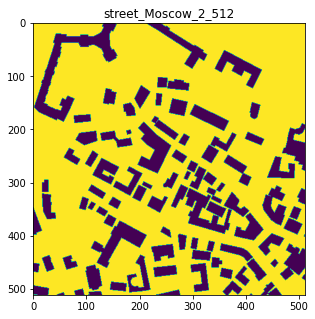

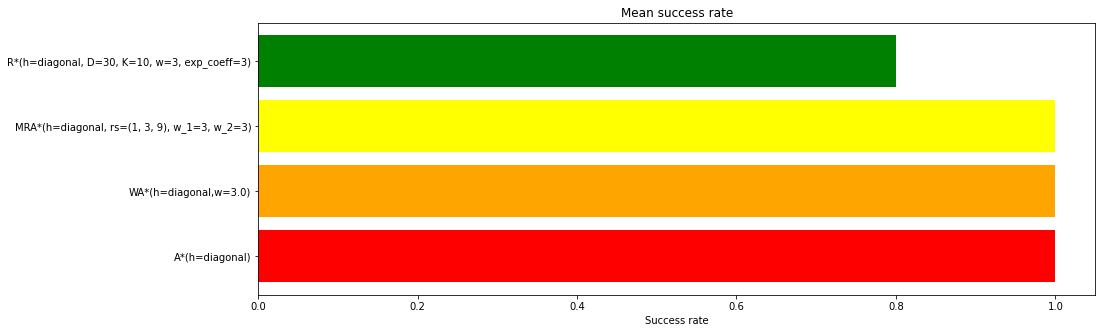

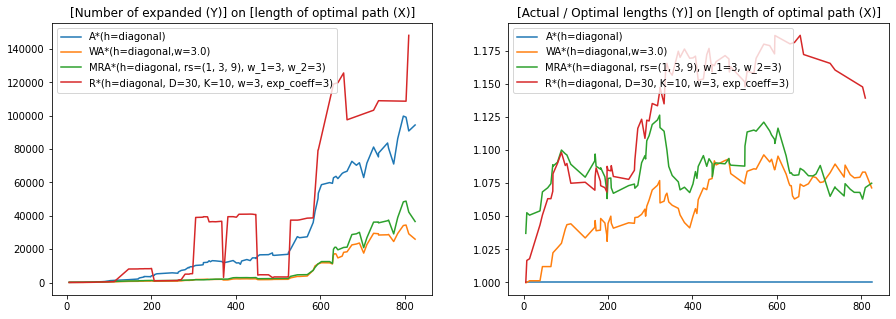

In [26]:
r2.read_map().draw(area)
p1.run()

#### STARCRAFT

In [23]:
area = MaiMaps.STARCRAFT
algorithms = [
    Astar(diagonal_dist),
    WAstar(diagonal_dist, 3),
    MRAstar(diagonal_dist, resolutions=(1, 3, 9, 27), w_1=3, w_2=3),
    Rstar(diagonal_dist, D=30, K=10, w=3, exp_coeff=3)
]

r3 = MaiReader(area).with_sampled_count_tasks(50)

p3 = Pipeline(
    reader=r3,
    algorithms=algorithms,
    processor=PROC,
    timelimit=10
)

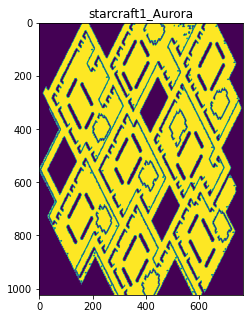

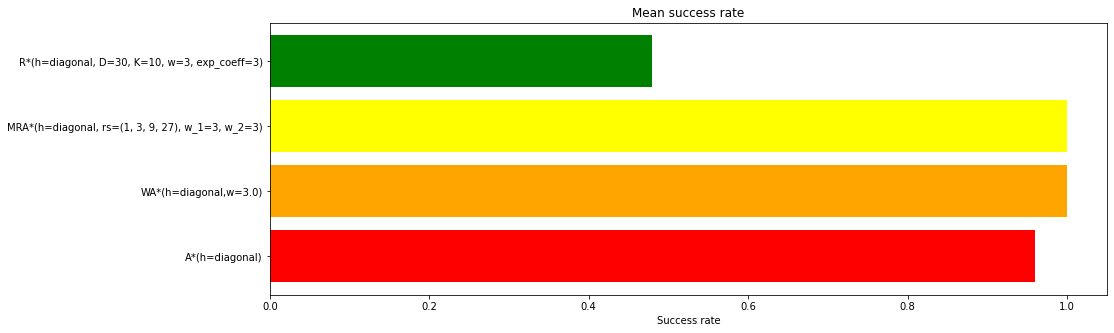

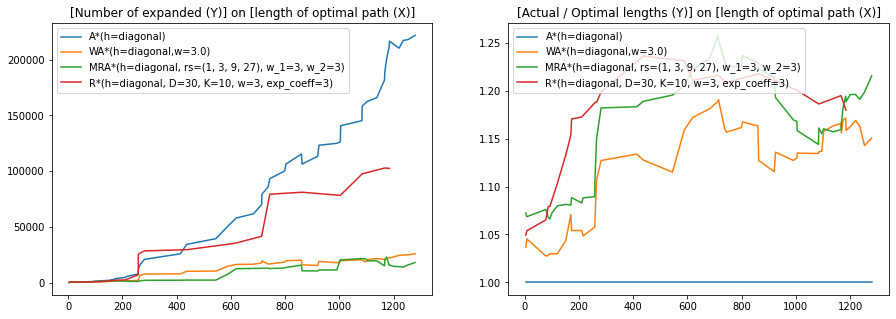

In [24]:
r3.read_map().draw(area)
p3.run()

## Зависимость от гиперпараметров

In [41]:
TLIMIT = 6

### R*

In [42]:
area = MaiMaps.MOSCOW

params = (
    {'D':10, 'K':5 , 'w':2, 'exp_coeff':3},
    {'D':10, 'K':10, 'w':2, 'exp_coeff':3},
    {'D':20, 'K':5 , 'w':2, 'exp_coeff':3},
    {'D':20, 'K':10, 'w':2, 'exp_coeff':3},
    {'D':30, 'K':5 , 'w':3, 'exp_coeff':4},
    {'D':30, 'K':10, 'w':3, 'exp_coeff':4},
    {'D':40, 'K':5 , 'w':3, 'exp_coeff':4},
    {'D':40, 'K':10, 'w':3, 'exp_coeff':4}
)
algorithms = [Rstar(diagonal_dist, **p) for p in params]
r4=MaiReader(area).with_sampled_count_tasks(25)

p4 = Pipeline(
    reader=r4,
    algorithms=algorithms,
    processor=PROC,
    timelimit=TLIMIT
)

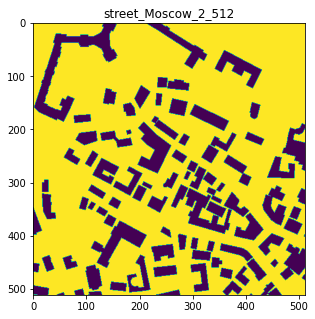

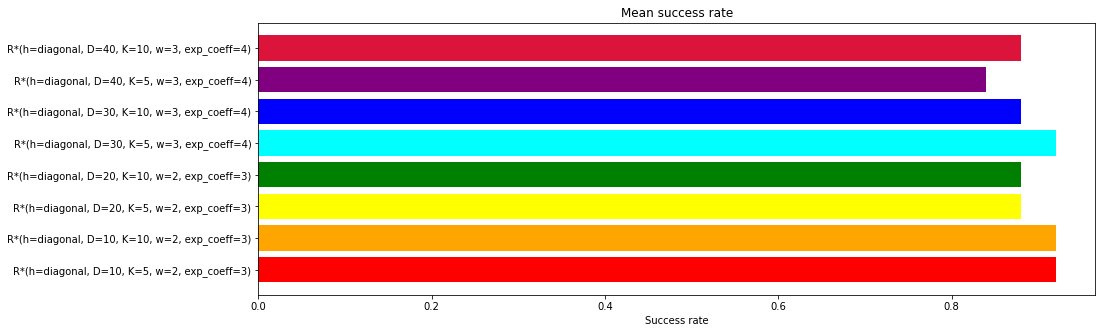

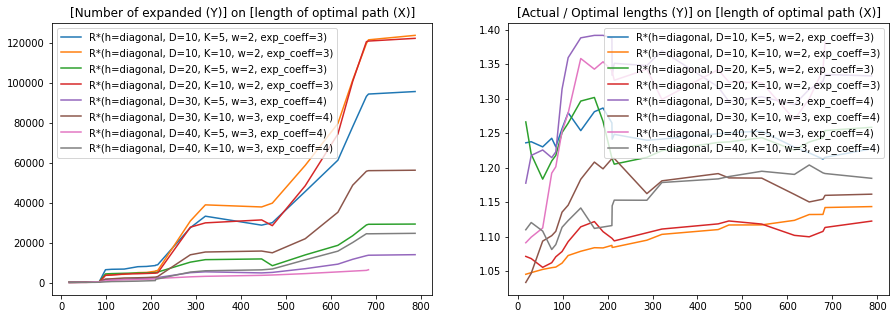

In [43]:
r4.read_map().draw(area)
p4.run()

## MRA*

In [34]:
area = MaiMaps.MOSCOW
params = (
    {'resolutions':(1, 3), 'w_1':3, 'w_2':3},
    {'resolutions':(1, 3, 9), 'w_1':3, 'w_2':3},
    {'resolutions':(1, 3, 5), 'w_1':3, 'w_2':3},
)
algorithms = [MRAstar(diagonal_dist, **p) for p in params]

r5 = MaiReader(area).with_sampled_count_tasks(50)
p5 = Pipeline(
    reader=r5,
    algorithms=algorithms,
    processor=PROC,
    timelimit=TLIMIT
)

In [46]:
area = MaiMaps.MOSCOW
params = (
    {'resolutions':(1, 3), 'w_1':3, 'w_2':3},
    {'resolutions':(1, 3), 'w_1':3, 'w_2':2},
    {'resolutions':(1, 3, 9), 'w_1':2, 'w_2':3},
    {'resolutions':(1, 3, 9), 'w_1':3, 'w_2':3},
    {'resolutions':(1, 3, 5), 'w_1':3, 'w_2':3},
    {'resolutions':(1, 3, 9, 27), 'w_1':3, 'w_2':3},
    {'resolutions':(1, 3, 5, 11), 'w_1':3, 'w_2':3},
)
algorithms = [MRAstar(diagonal_dist, **p) for p in params]

r5 = MaiReader(area).with_sampled_count_tasks(50)
p5 = Pipeline(
    reader=r5,
    algorithms=algorithms,
    processor=PROC,
    timelimit=TLIMIT
)

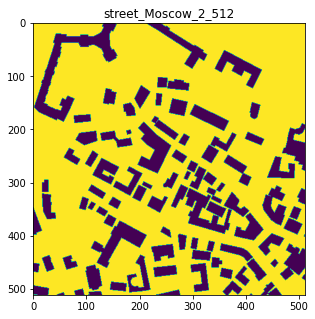

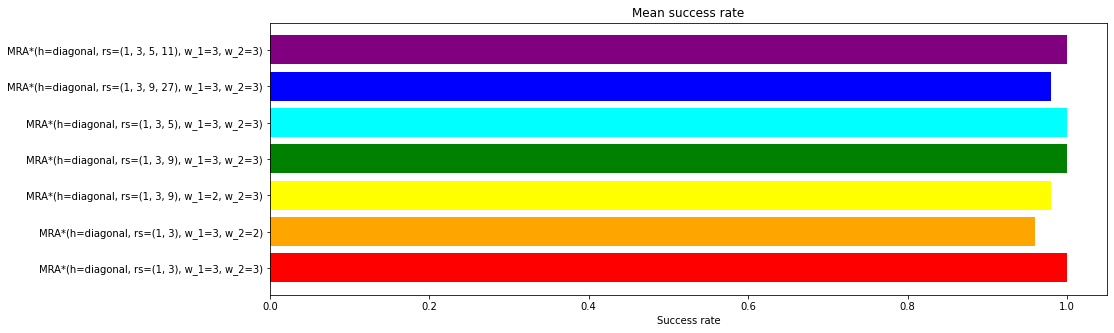

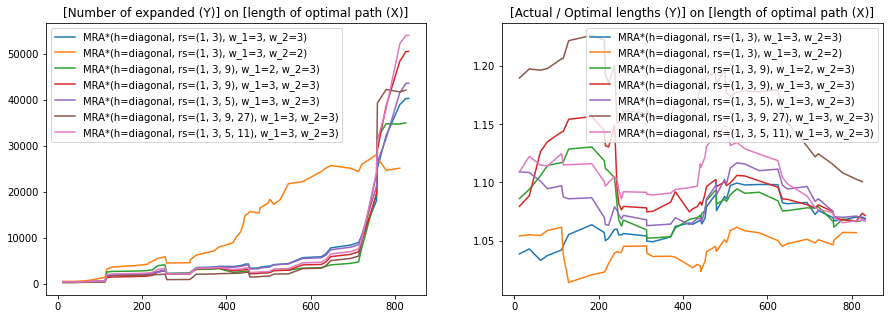

In [47]:
r5.read_map().draw(area)
p5.run()

In [37]:
show_algos = (
    Astar(diagonal_dist),
    WAstar(diagonal_dist, 3), 
    Rstar(diagonal_dist, **{'D':20, 'K':5 , 'w':3, 'exp_coeff':4}),
    Rstar(diagonal_dist, **{'D':30, 'K':5 , 'w':3, 'exp_coeff':4}),
    MRAstar(diagonal_dist, **{'resolutions':(1, 3), 'w_1':3, 'w_2':3}),
    MRAstar(diagonal_dist, **{'resolutions':(1, 3, 9), 'w_1':3, 'w_2':3}),
)

# sel_task = max(r5.read_tasks(), key=lambda x:x.opt_len)

# r6 = r5.with_sampled_count_tasks(1)
r6 = r5.with_task(Task(start_c=(476, 175), goal_c=(498, 354), opt_len=214.94112549))
p6 = Pipeline(
    reader=r6,
    algorithms=show_algos,
    processor=VisualizeMaiMap(),
    timelimit=40
)

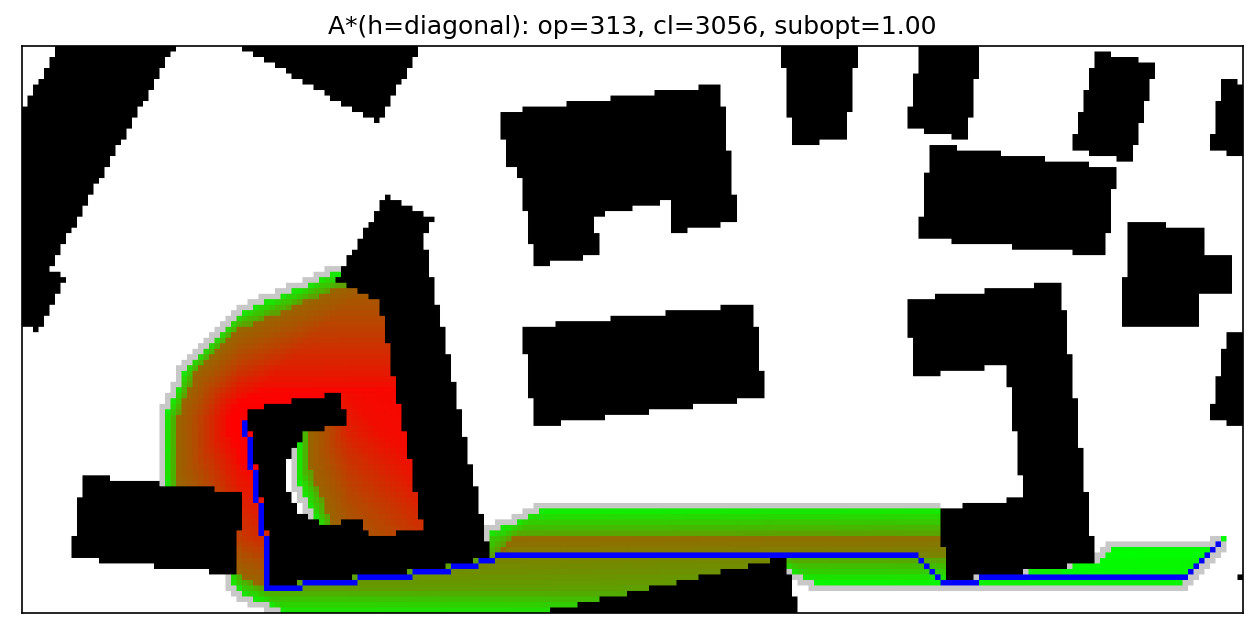

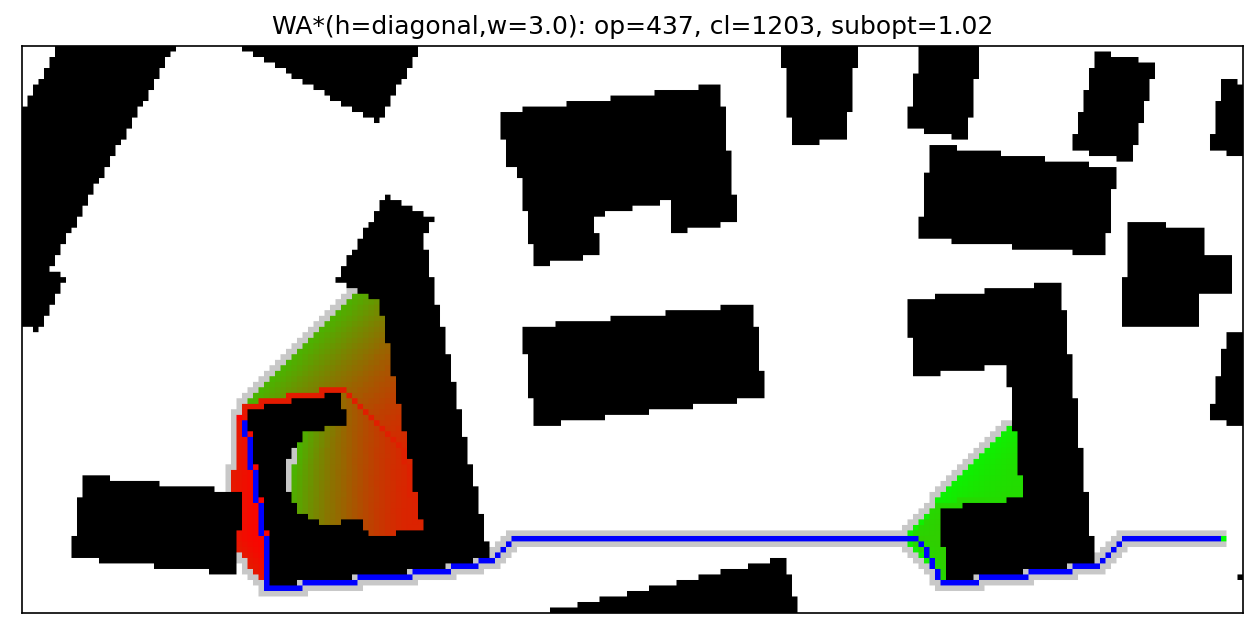

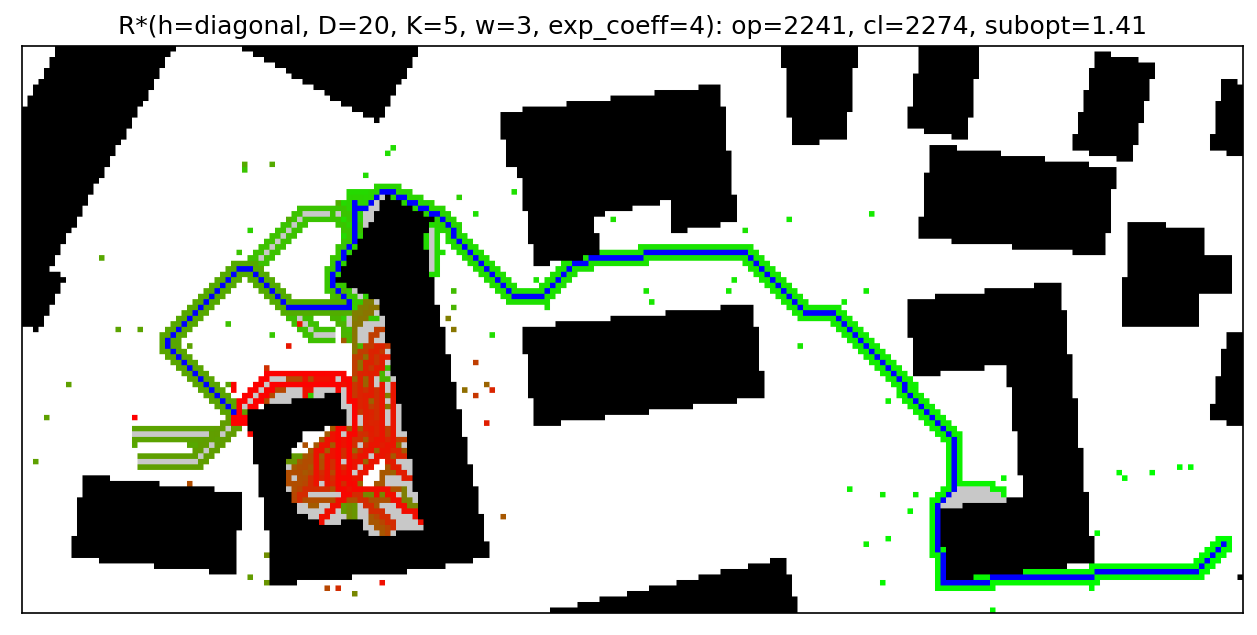

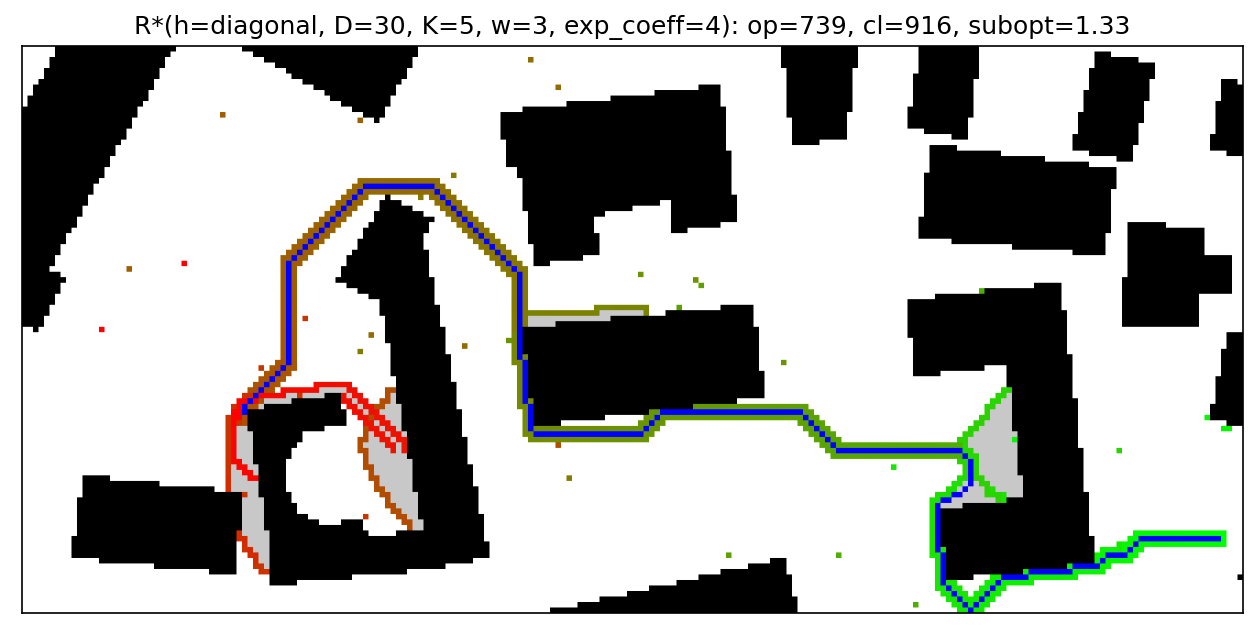

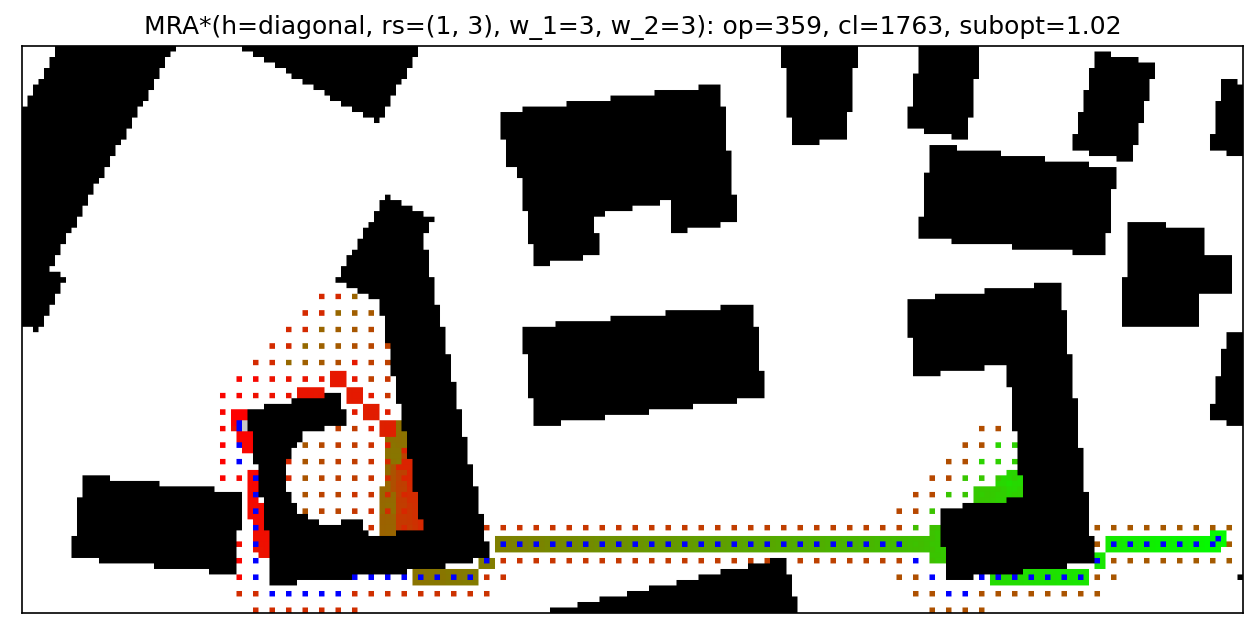

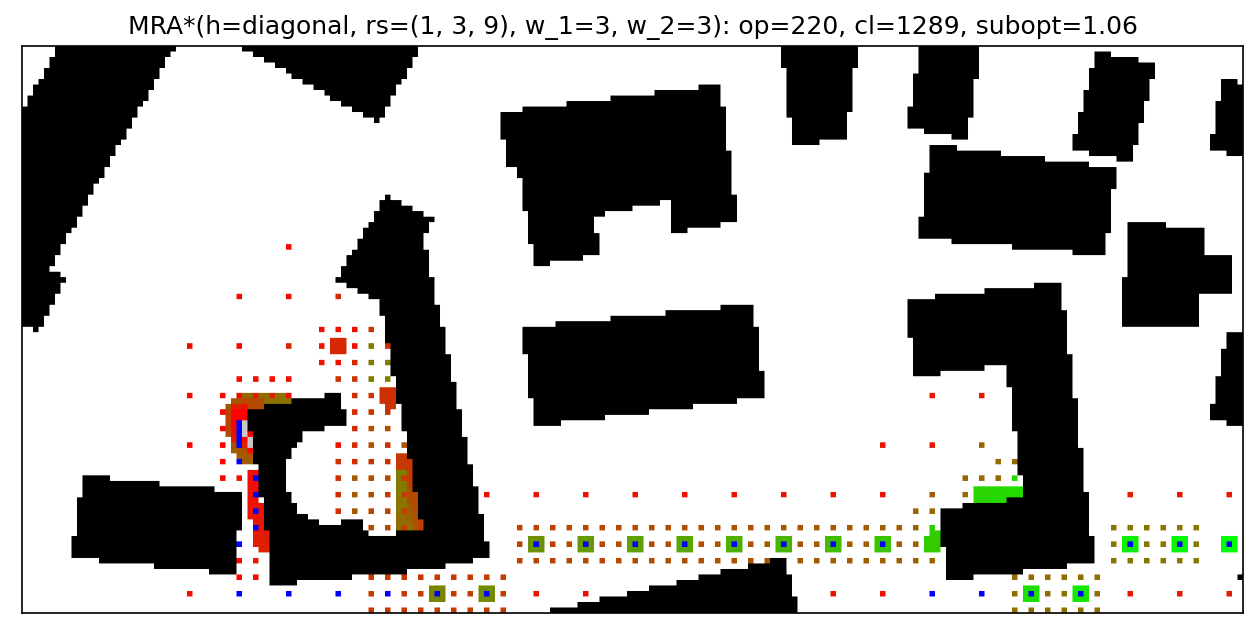

In [38]:
p6.run()

In [39]:
p6.with_processor(VisualizeMaiMapGif()).run()

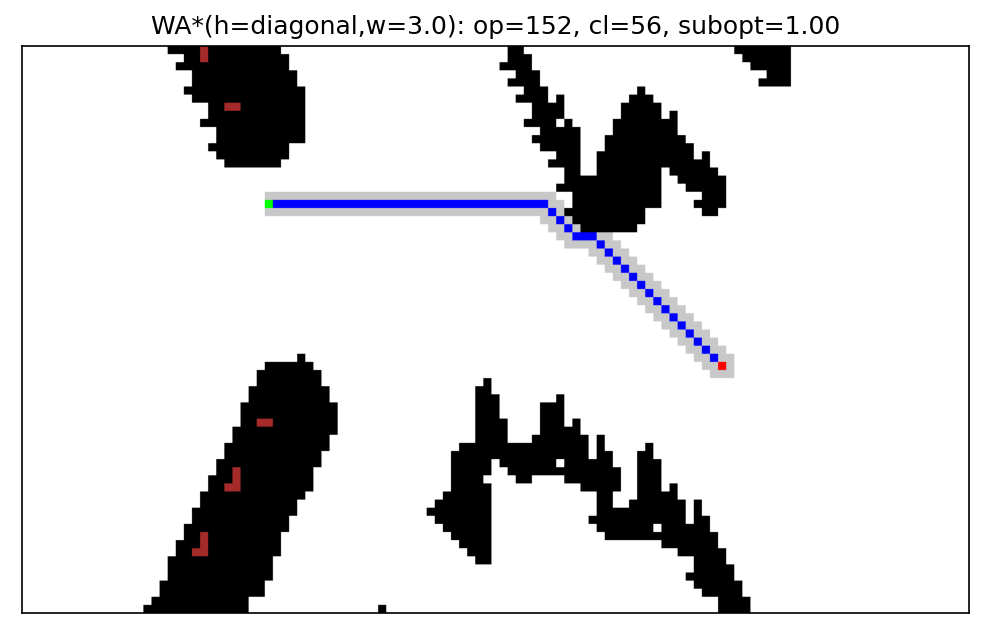

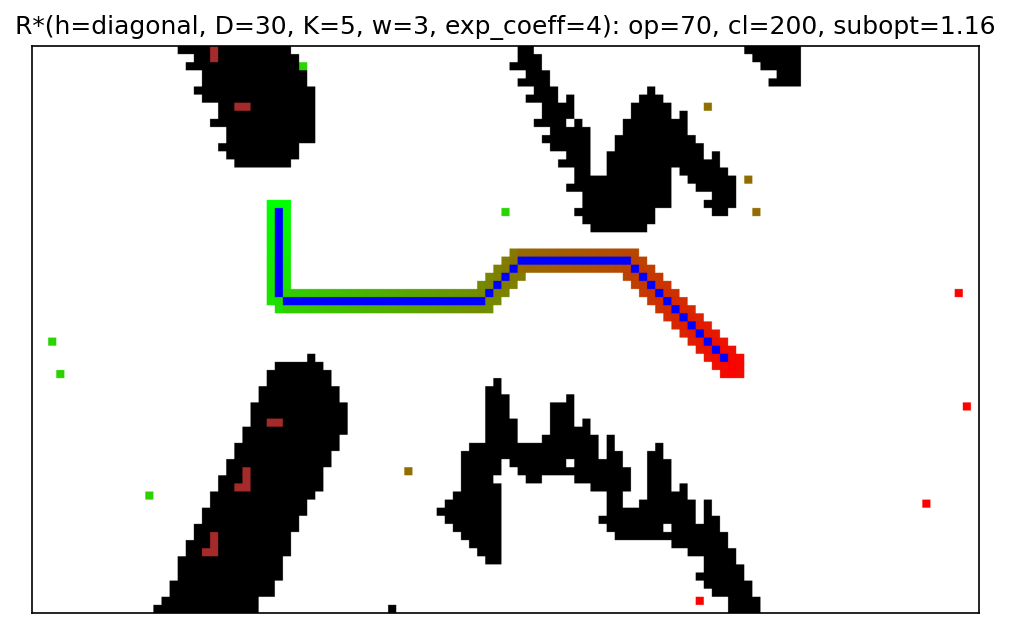

In [40]:
algos7 = (
    WAstar(diagonal_dist, 3), 
    Rstar(diagonal_dist, **{'D':30, 'K':5 , 'w':3, 'exp_coeff':4}),
)


r7 = MaiReader(MaiMaps.STARCRAFT).with_sampled_count_tasks(1)
p7 = Pipeline(
    reader=r7,
    algorithms=algos7,
    processor=VisualizeMaiMap(),
    timelimit=40
)
p7.run()